<a href="https://colab.research.google.com/github/Zoezyh/Pytorch-Practice/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Feb 22 07:27:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   69C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device_cpu = "cpu"

2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

Camera and photo apps use computer vision to enhance and sort images.

Modern cars use computer vision to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting means creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1.Train with more data.

2.Feature selection.

3.Regularization.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Check versions
print(torch.__version__)
print(torchvision.__version__)

# Setup training data
train_data = datasets.MNIST(
  root="data",
  train=True,
  download=True,
  transform=torchvision.transforms.ToTensor(),
  target_transform=None
)

test_data = datasets.MNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

class_names = train_data.classes

2.5.1+cu124
0.20.1+cu124


## 6. Visualize at least 5 different samples of the MNIST training dataset.

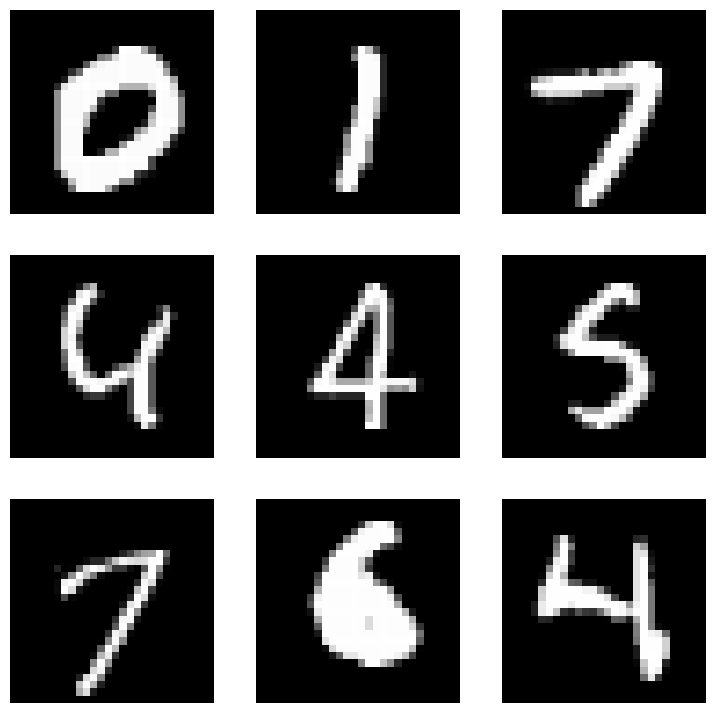

In [4]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt
import random

train_samples = []
train_labels = []
for sample, label in random.sample(list(train_data), k=9):
  train_samples.append(sample)
  train_labels.append(label)

# View the first sample shape
train_samples[0].shape

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(train_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                batch_size=BATCH_SIZE,
                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
               batch_size=BATCH_SIZE,
               shuffle=False)

train_dataloader, test_dataloader

from tqdm.auto import tqdm

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
# Create TinyVGG
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      # Create a conv layer
      nn.Conv2d(in_channels=input_shape,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,# Trick!
             out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1:{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2:{x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier:{x.shape}")
    return(x)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
torch.manual_seed(42)
model_cpu = TinyVGG(input_shape=1,
         hidden_units=10,
         output_shape=len(class_names))
torch.manual_seed(42)
model = TinyVGG(input_shape=1,
         hidden_units=10,
         output_shape=len(class_names)).to(device)

In [8]:
rand_image_tensor = torch.randn(size=(1,28,28))

In [9]:
# Trick!
model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

Functionizing training and evaluation/testing loops

In [10]:
def train_step(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        optimizer:torch.optim.Optimizer,
        accuracy_fn,
        device:torch.device=device):
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                  y_pred=y_pred.argmax(dim=1)) # go from logits

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [11]:
def test_step(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        accuracy_fn,
        device:torch.device=device):
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference model context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calcualte the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                   y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [12]:
def eval_model(model:torch.nn.Module,
        data_loader:torch.utils.data.DataLoader,
        loss_fn:torch.nn.Module,
        accuracy_fn,
        device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                 y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
       "model_loss": loss.item(),
       "model_acc": acc}

In [13]:
def print_train_time(start: float,
           end: float,
           device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [14]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_cpu = torch.optim.SGD(params=model_cpu.parameters(),
               lr=0.1)
optimizer = torch.optim.SGD(params=model.parameters(),
               lr=0.1)

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn


helper_functions.py already exists, skipping download...


In [15]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# On cpu
# Measure time
from timeit import default_timer as timer
train_time_start_model_on_cpu = timer()

# Train and test model on cpu
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_cpu,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer_cpu,
        accuracy_fn=accuracy_fn,
        device=device_cpu)
  test_step(model=model_cpu,
       data_loader=test_dataloader,
       loss_fn=loss_fn,
       accuracy_fn=accuracy_fn,
       device=device_cpu)

train_time_end_model_on_cpu = timer()
total_train_time_model_on_cpu = print_train_time(start=train_time_start_model_on_cpu,
                         end=train_time_end_model_on_cpu,
                         device=device_cpu)


# On gpu

train_time_start_model_on_gpu = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
  test_step(model=model,
       data_loader=test_dataloader,
       loss_fn=loss_fn,
       accuracy_fn=accuracy_fn,
       device=device)

train_time_end_model_on_gpu = timer()
total_train_time_model_on_gpu = print_train_time(start=train_time_start_model_on_gpu,
                         end=train_time_end_model_on_gpu,
                         device=device)

model_cpu_results = eval_model(model=model_cpu,
                 data_loader=test_dataloader,
                 loss_fn=loss_fn,
                 accuracy_fn=accuracy_fn,
                 device=device_cpu)
model_gpu_results = eval_model(model=model,
                 data_loader=test_dataloader,
                 loss_fn=loss_fn,
                 accuracy_fn=accuracy_fn,
                 device=device)
print(model_cpu_results)
print(model_gpu_results)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.32017 | Train acc: 89.23%
Test loss: 0.07544 | Test acc: 97.72%
Epoch: 1
-------
Train loss: 0.08204 | Train acc: 97.48%
Test loss: 0.06162 | Test acc: 97.92%
Epoch: 2
-------
Train loss: 0.06394 | Train acc: 98.02%
Test loss: 0.05525 | Test acc: 98.10%
Epoch: 3
-------
Train loss: 0.05469 | Train acc: 98.27%
Test loss: 0.04741 | Test acc: 98.38%
Epoch: 4
-------
Train loss: 0.04825 | Train acc: 98.47%
Test loss: 0.04637 | Test acc: 98.35%
Train time on cpu: 203.333 seconds


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.25768 | Train acc: 91.51%
Test loss: 0.05889 | Test acc: 98.10%
Epoch: 1
-------
Train loss: 0.06845 | Train acc: 97.89%
Test loss: 0.04684 | Test acc: 98.48%
Epoch: 2
-------
Train loss: 0.05267 | Train acc: 98.37%
Test loss: 0.03860 | Test acc: 98.61%
Epoch: 3
-------
Train loss: 0.04422 | Train acc: 98.65%
Test loss: 0.04342 | Test acc: 98.52%
Epoch: 4
-------
Train loss: 0.03903 | Train acc: 98.79%
Test loss: 0.03663 | Test acc: 98.72%
Train time on cuda: 67.154 seconds


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'TinyVGG', 'model_loss': 0.046373218297958374, 'model_acc': 98.3526357827476}
{'model_name': 'TinyVGG', 'model_loss': 0.036634236574172974, 'model_acc': 98.72204472843451}


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [16]:
def make_predictions(model:torch.nn.Module,
           data:list,
           device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits
      pred_logit = model(sample)

      # Get prediction probability(logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

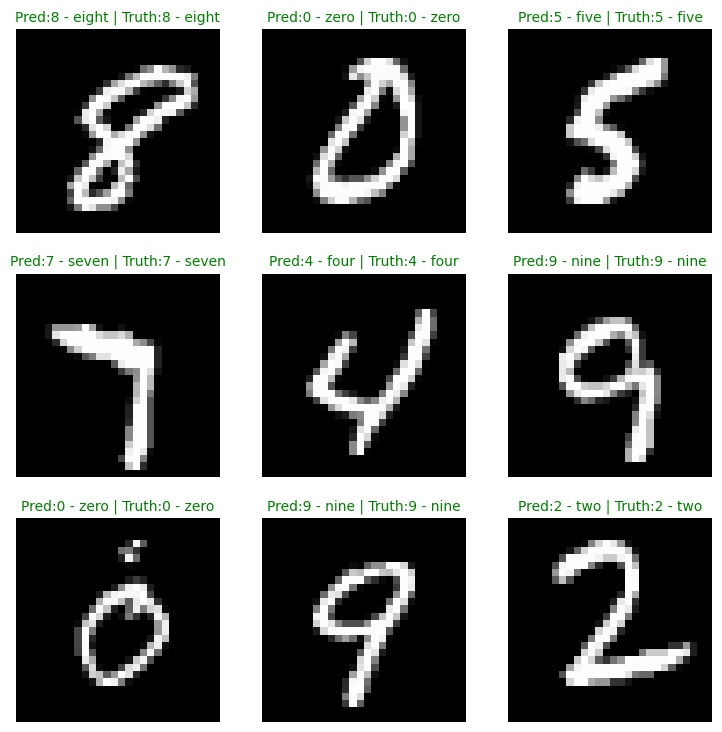

In [17]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Make predictions
pred_probs = make_predictions(model=model,
                data=test_samples)

# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)

# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred:{pred_label} | Truth:{truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [18]:
# Make prediction with trained model (需要用到所有的test_data,所以需要全部predict一遍)
y_preds = []
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y  = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilites -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [19]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


In [20]:
test_data.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

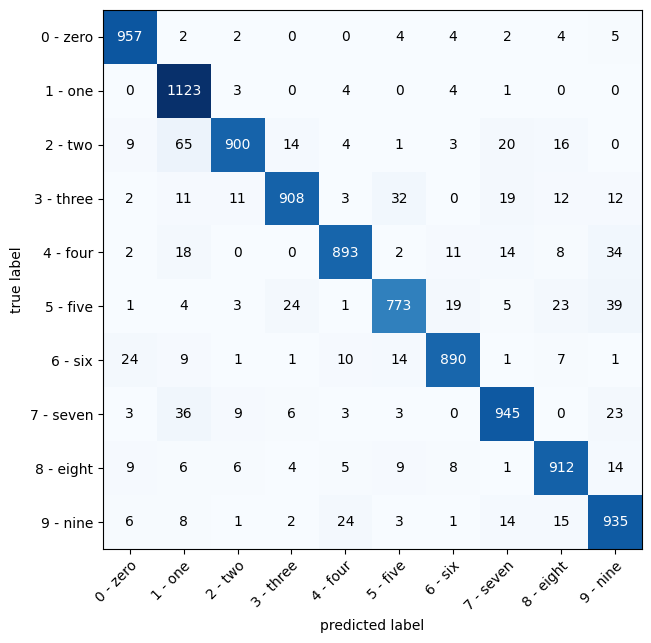

In [22]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2.Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
              target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [37]:
torch.manual_seed(42)

# Create a random tensor
rand_tensor = torch.randn(size=(1, 3, 64, 64))

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
             out_channels=10,
             kernel_size=3,
             padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(rand_tensor)
conv_output.shape

torch.Size([1, 10, 62, 62])

When kernel_size parameter goes up, the shape of conv_output goes down. Vice versa.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

tran_data_2 = datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform=torchvision.transforms.ToTensor(),
  target_transform=None
)

test_data_2 = dataset.FashionMNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor(),
  target_transform=None
)

class_names_2 = train_data_2.classes

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_2 = DataLoader(dataset=train_data_2,
                 batch_size=BATCH_SIZE,
                 shuffle=True)

test_dataloader_2 = DataLoader(dataset=test_data_2,
                 batch_size=BATCH_SIZE,
                 shuffle=False)

model_2 = TinyVGG(input_shape=1,
          hidden_units=10,
          output_shape=10).to(device)


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
        data_loader=train_dataloader_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
  test_step(model=model_2,
       data_loader=test_dataloader_2,
       loss_fn=loss_fn,
       accuracy_fn=accuracy_fn,
       device=device)


# Make predictions
test_preds = []
model_2_eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    test_logits = model_2(X)
    test_pred = torch.softmax(test_logits.squeeze(), dim=0).argmax(dim=1)
    test_preds.append(test_pred.cpu())

test_pred_tensor = torch.cat(test_preds)


In [ ]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_pred_tensor != test_data_2.targets)[0]
len(wrong_pred_indexes)

In [ ]:
import random
random.seed(42)
random_selection = random.sample(list(wrong_pred_indexes), k=9)

# Plot wrong predictions
plt.figure(figsize=(9,9))
for i, idx in enumerate(random_selection):
  plt.subplot(3, 3, i+1)
  plt.imshow(test_data_2[idx][0].squeeze(),cmap="gray")
  wrong_pred_label = class_names_2[test_pred_tensor[idx]]
  true_pred_label = class_names_2[test_data_2[idx][1]]

  # Create a title for the plot
  title_text = f"Pred: {wrong_pred_label} | Truth:{true_pred_label}"

  # Check for equality between pred and truth and change color of title text
  if wrong_pred_label == true_pred_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);